# Handwritten Digit recognizer

The purpose of this model is to develop a  Convolutional Neural Network for recognizing handwritten digits


### Import statements

In [25]:
import tensorflow as tf

from keras.preprocessing import image

from tensorflow.python.keras.callbacks import ReduceLROnPlateau

import sys
sys.path.insert(1, "/home/azureuser/DataAnalyzer/src/modules")

from modules.data_validator import *
from modules.data_processing import *

## The data preparation


#### Data visualisation

In [26]:
#TODO:

### Data Validation

Validate the dataset using the data_validator method

In [27]:

training_path = "/home/azureuser/DataAnalyzer/digit_data/training"
testing_path =  "/home/azureuser/DataAnalyzer/digit_data/testing"
for i in range(10):
    data_validator(training_path+ str(i))
    data_validator(testing_path+ str(i))

### Generate directory to read images from & Data augmentation

#### Normalization

To avoid overfitting we will alter our dataset.
We chose :

    - Random rotation by 10° of some training image
    - Brightness_range from 30 to 70 : The user will take picture so we will adapt our model

    -Shift image to make them not in the center
        - Randomly shift images vertically
        - Randomly shift images horizontally


In [28]:
train_datagen = image.ImageDataGenerator(rescale=1.0/255.,rotation_range=10, zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.3,
        height_shift_range=0.3) 
test_datagen = image.ImageDataGenerator(rescale=1.0/255.,rotation_range=10, zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.3,
        height_shift_range=0.3)


#### Generate and set directory to read images from with data augnemtation

In [29]:
#object of class ImageDataGenerator with the recale property
train_generator = train_datagen.flow_from_directory(training_path,batch_size=600,class_mode='sparse',target_size=(28, 28),color_mode="rgb"  )

test_generator = test_datagen.flow_from_directory(testing_path, batch_size=600,class_mode='sparse',target_size=(28, 28),color_mode="rgb")


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


test_generator & train_generator are directory to read images from.
Each subdirectory (digits directory) in this directory will be considered to contain images from one class.

In [30]:
print(test_generator.image_shape)
print(test_generator.save_to_dir)
print(train_generator.class_indices)

(28, 28, 3)
None
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


## The CNN modeling and evaluation

### Model


Model : we have to avoid overfitting

Softmax :  Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
activation layer : tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
10 : because we have ten classes

In [31]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#### compile the model
Following the results got by  https://github.com/sanghvirajit/Feedforward_Neural_Network
We make the choice of the RMSprop optimizer


In [32]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)

model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the model

Reduce learning rate when a metric has stopped improving,we will gain in time while fitting the model by converging faster to the global minimum by decreasing the learning rate.
Set a learning rate annealer. we chose to decrease by 75%

In [33]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5, # number of epochs with no improvement after which learning rate will be reduced.
                                            verbose=1, #update messages
                                            factor=0.25, #new_lr = lr * factor`.
                                            min_lr=0.00001 # minimum learning rate
                                            )

In [34]:
history = model.fit(train_generator, epochs=50, 
        validation_data=test_generator,  callbacks=[learning_rate_reduction])

Epoch 1/50
100/100 [==============================] - 63s 628ms/step - loss: 1.3756 - accuracy: 0.5415 - val_loss: 0.9438 - val_accuracy: 0.6952 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 52s 518ms/step - loss: 0.6949 - accuracy: 0.7782 - val_loss: 0.5228 - val_accuracy: 0.8334 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 52s 519ms/step - loss: 0.4929 - accuracy: 0.8453 - val_loss: 0.3591 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 52s 515ms/step - loss: 0.3887 - accuracy: 0.8784 - val_loss: 0.3325 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 51s 514ms/step - loss: 0.3158 - accuracy: 0.9007 - val_loss: 0.2505 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 51s 513ms/step - loss: 0.2734 - accuracy: 0.9134 - val_loss: 0.2445 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

## Model Evaluation

In [35]:
##TODO

In [36]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/testing/0/3.png",model)

(28, 28, 3)
1/1 [==============================] - 0s 63ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
[0]


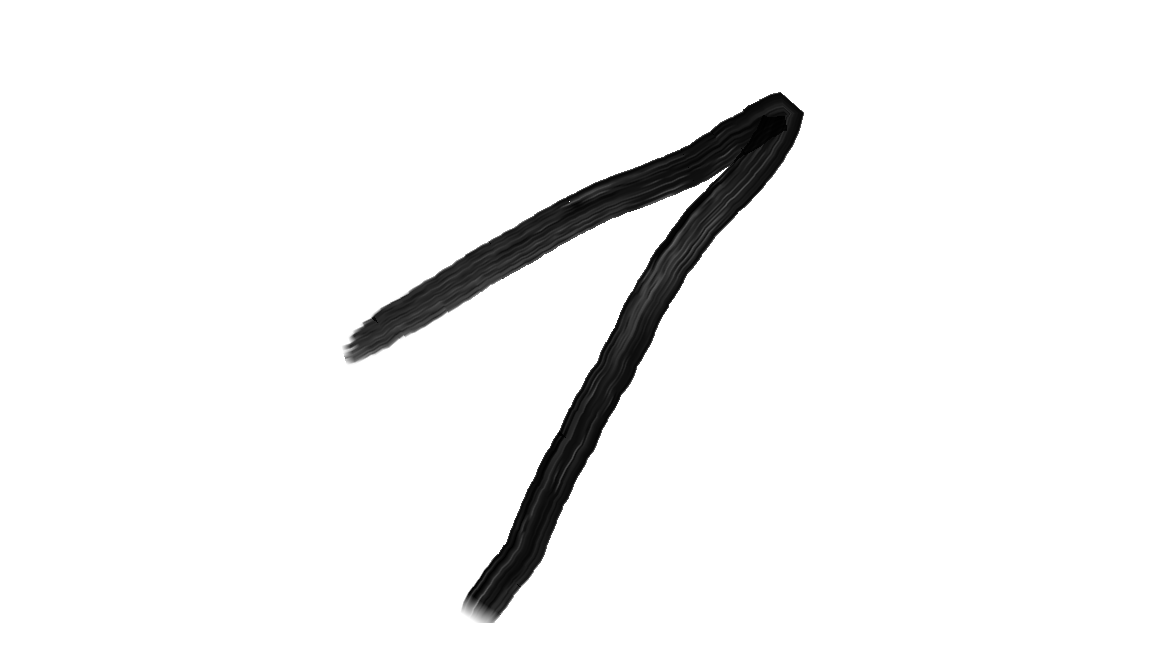

(255, 255, 255)
-57
-57
-60
-120
-123
-108
-84
-117
-183
-198
-177
-129
-57
-51
-66
-102
-126
-159
-237
-198
-255
-267
-240
-159
-72
-84
-123
-174
-186
-222
-285
-360
-342
-162
-132
-114
-294
-330
-333
-306
-174
-105
-120
-189
-237
-243
-279
-330
-399
-321
-186
-180
-141
-81
-201
-366
-414
-399
-333
-171
-141
-171
-261
-294
-297
-324
-372
-435
-315
-231
-222
-171
-114
-57
-312
-444
-495
-462
-339
-150
-180
-243
-345
-348
-348
-366
-411
-423
-318
-276
-255
-201
-147
-90
-99
-99
-75
-144
-438
-531
-561
-525
-330
-186
-222
-321
-411
-399
-393
-399
-444
-423
-339
-318
-285
-234
-177
-108
-153
-216
-189
-153
-114
-84
-78
-333
-531
-621
-621
-558
-303
-225
-270
-408
-465
-450
-426
-432
-471
-435
-384
-357
-315
-267
-210
-114
-60
-177
-318
-312
-279
-222
-177
-147
-282
-516
-588
-639
-627
-480
-240
-270
-351
-504
-516
-489
-453
-465
-489
-459
-423
-393
-351
-297
-240
-102
-69
-174
-378
-441
-411
-345
-279
-240
-267
-456
-573
-633
-633
-582
-375
-291
-327
-456
-573
-555
-516
-468
-492
-507
-49

(28, 28, 3)
1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1.0
[7]


In [39]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/1.png",model)

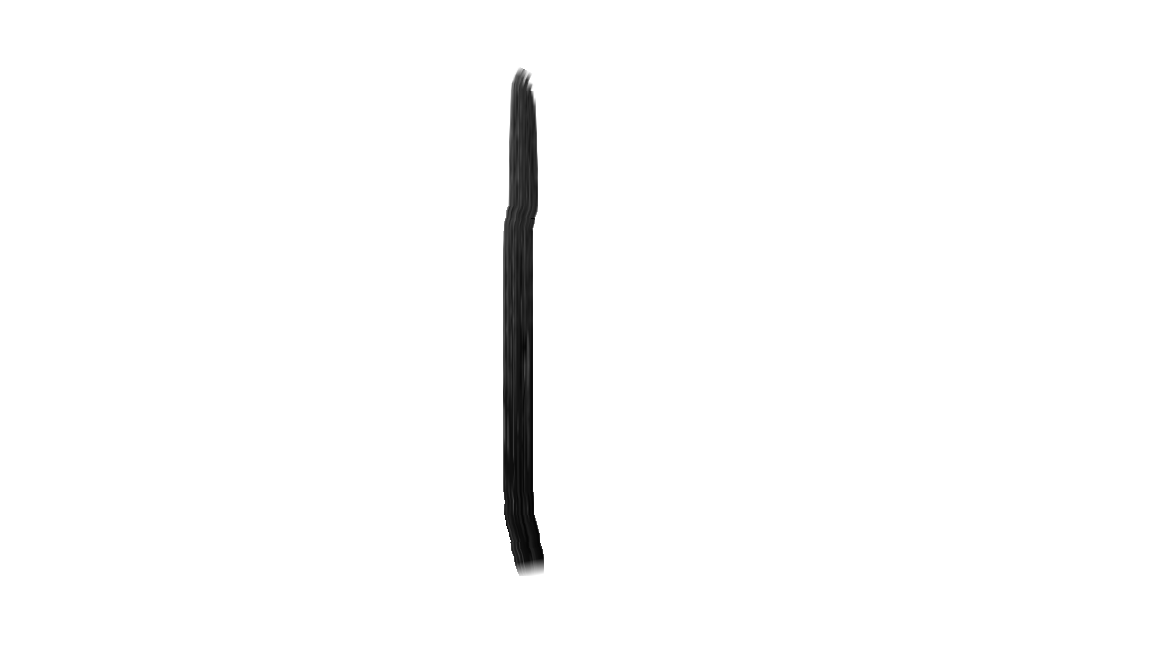

(255, 255, 255)
-195
-201
-210
-216
-225
-231
-240
-246
-255
-270
-291
-309
-330
-351
-372
-393
-411
-432
-441
-447
-450
-453
-459
-462
-465
-471
-474
-477
-477
-474
-474
-474
-474
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-474
-474
-477
-477
-480
-480
-483
-483
-486
-489
-492
-498
-501
-504
-507
-510
-513
-513
-510
-510
-507
-504
-501
-498
-498
-495
-495
-495
-495
-495
-492
-492
-492
-492
-492
-492
-492
-489
-489
-489
-489
-486
-486
-486
-486
-492
-495
-498
-501
-504
-507
-510
-513
-513
-510
-507
-507
-504
-501
-498
-498
-495
-495
-498
-501
-501
-504
-507
-507
-510
-513
-516
-519
-522
-525
-531
-534
-537
-540
-543
-546
-543
-543
-543
-540
-540
-540
-537
-534
-528
-522
-516
-510
-504
-498
-492
-486
-486
-486
-489
-492
-498
-501
-504
-507
-510
-519
-534
-549
-564
-579
-594
-609
-624
-639
-645
-642
-639
-633
-627
-624
-618
-612
-609
-600
-588
-573
-561
-546
-534
-519
-507
-492
-486
-486
-486
-486
-486
-486
-486
-486
-486
-483
-483
-480
-477
-474
-474
-471
-468
-465

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
[1]


In [40]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/1_1.png",model)

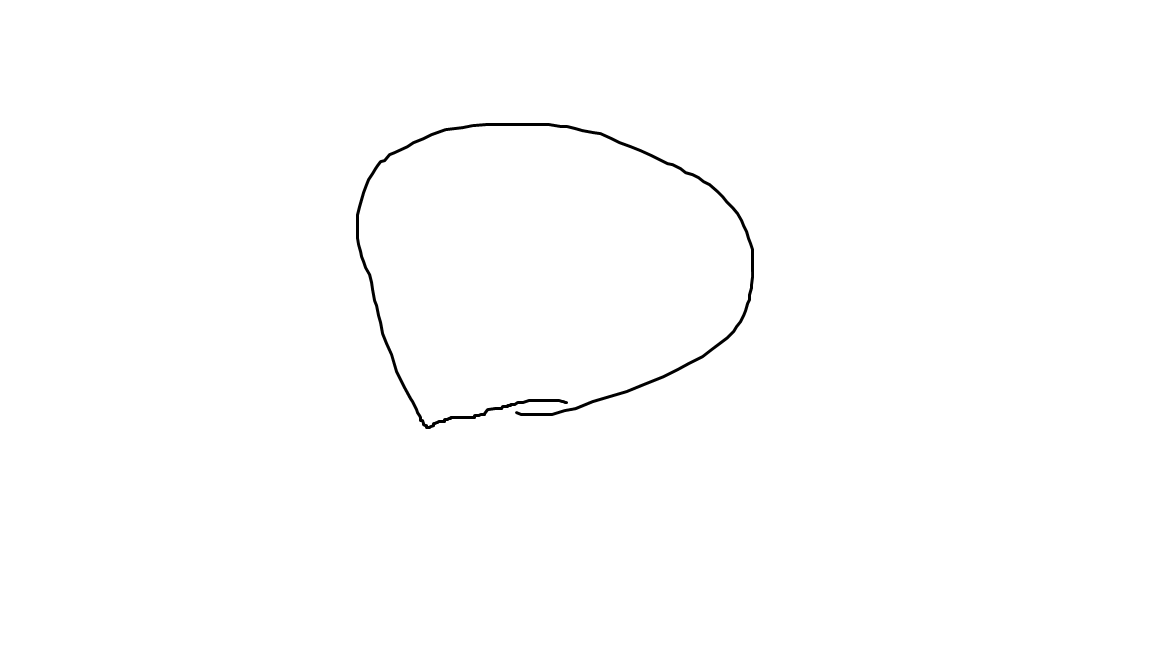

(255, 255, 255)
-144
-336
-525
-717
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-741
-597
-453
-336
-216
-72
-144
-336
-525
-717
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-717
-525
-336
-96
-72
-288
-501
-717
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-765
-669
-453
-240
-192
-384
-621
-765
-765
-765
-765
-765
-765
-765
-765
-717
-525
-336
-144
-168
-312
-429
-549
-693
-765
-765
-765
-765
-765
-765
-765
-741
-597
-429
-288
-144
-72
-288
-501
-717
-765
-765
-765
-765
-765
-765
-765
-717
-525
-336
-144
-72
-288
-501
-717
-765
-765
-765
-765
-765
-765
-765
-765
-741
-525
-240
-168
-384
-597
-765
-765
-765
-765
-765
-765
-765
-765
-597
-384
-168

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0.000000e+00 0.000000e+00 1.164668e-21 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00]]
1.0
[8]


In [41]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/my0.png",model)

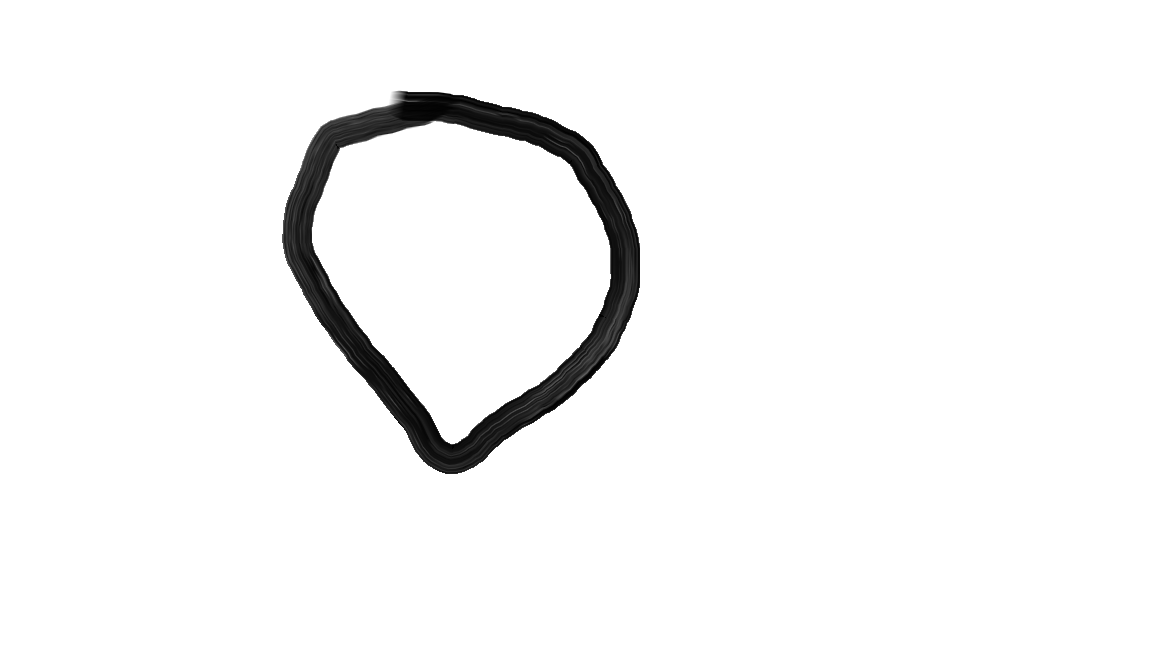

(255, 255, 255)
-492
-492
-492
-492
-492
-492
-489
-489
-489
-513
-513
-516
-519
-519
-519
-519
-522
-525
-528
-531
-534
-540
-543
-546
-549
-555
-555
-558
-558
-558
-555
-555
-543
-534
-519
-507
-498
-486
-507
-513
-519
-522
-525
-525
-528
-534
-564
-591
-615
-621
-624
-627
-633
-639
-642
-648
-651
-654
-660
-663
-663
-666
-666
-666
-666
-666
-666
-666
-648
-627
-606
-585
-567
-552
-543
-531
-519
-510
-504
-486
-504
-516
-528
-537
-540
-546
-555
-570
-585
-597
-612
-633
-660
-669
-648
-633
-633
-633
-630
-630
-630
-630
-633
-636
-639
-639
-642
-648
-651
-657
-657
-654
-654
-651
-651
-660
-669
-678
-687
-687
-666
-648
-624
-597
-570
-546
-537
-528
-519
-510
-489
-507
-525
-540
-555
-573
-597
-621
-636
-651
-663
-678
-666
-651
-636
-618
-603
-588
-570
-570
-576
-576
-576
-576
-576
-576
-579
-585
-585
-588
-591
-591
-594
-597
-600
-600
-597
-594
-594
-591
-600
-609
-618
-627
-636
-645
-651
-660
-672
-684
-663
-636
-603
-564
-537
-528
-522
-513
-486
-510
-537
-561
-591
-615
-642
-669
-693

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1.0
[8]


In [42]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/my0_1.png",model)

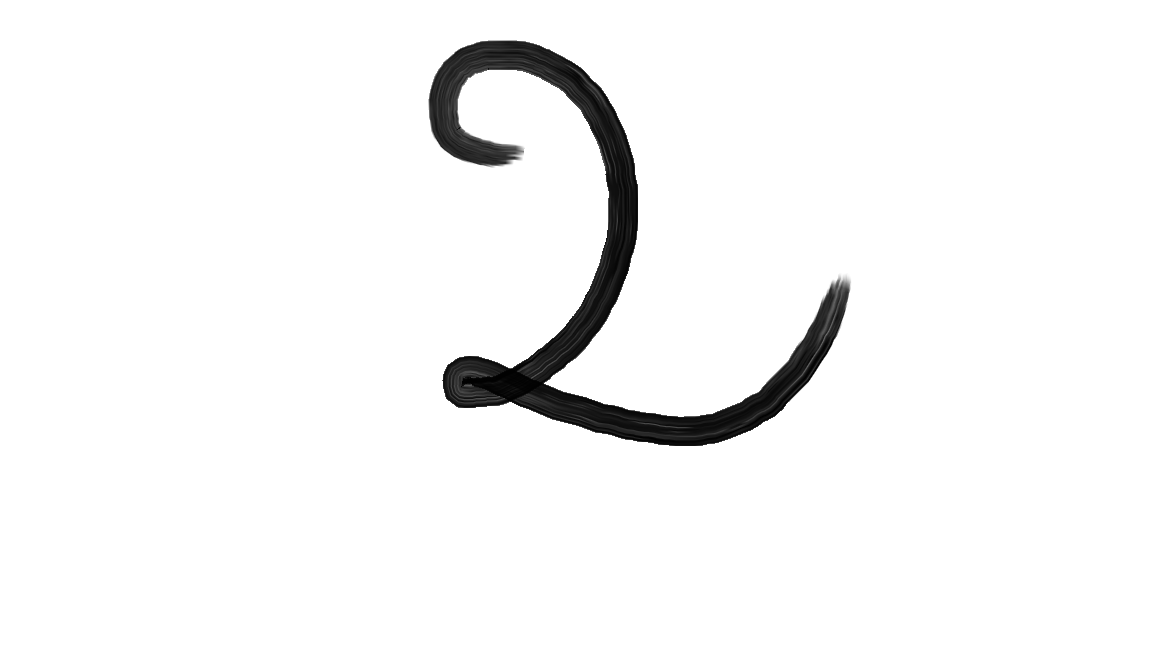

(255, 255, 255)
-201
-195
-183
-168
-153
-141
-126
-114
-99
-84
-75
-210
-273
-333
-390
-450
-510
-570
-561
-549
-537
-525
-513
-501
-489
-477
-465
-462
-456
-447
-435
-423
-408
-393
-381
-348
-237
-117
-249
-354
-456
-525
-585
-624
-633
-642
-654
-666
-678
-672
-666
-660
-648
-642
-636
-627
-618
-612
-609
-609
-606
-603
-603
-600
-600
-597
-591
-585
-573
-480
-402
-333
-264
-201
-144
-87
-207
-309
-414
-522
-624
-645
-657
-669
-681
-690
-690
-684
-678
-672
-666
-666
-660
-654
-648
-642
-636
-630
-624
-618
-615
-618
-621
-621
-624
-624
-624
-627
-630
-633
-633
-615
-600
-579
-555
-528
-495
-459
-420
-357
-300
-246
-153
-252
-363
-465
-570
-633
-654
-672
-684
-690
-675
-663
-657
-651
-648
-651
-657
-663
-669
-672
-666
-663
-660
-657
-654
-648
-645
-642
-639
-636
-636
-636
-633
-630
-630
-627
-627
-627
-630
-633
-633
-636
-639
-639
-642
-645
-624
-597
-564
-528
-432
-315
-192
-84
-255
-363
-471
-588
-627
-651
-672
-690
-678
-663
-648
-636
-639
-651
-654
-663
-666
-672
-669
-663
-660
-660

(28, 28, 3)
1/1 [==============================] - 0s 16ms/step
[[0.0000000e+00 0.0000000e+00 1.3538465e-19 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
1.0
[8]


In [43]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/2.png",model)

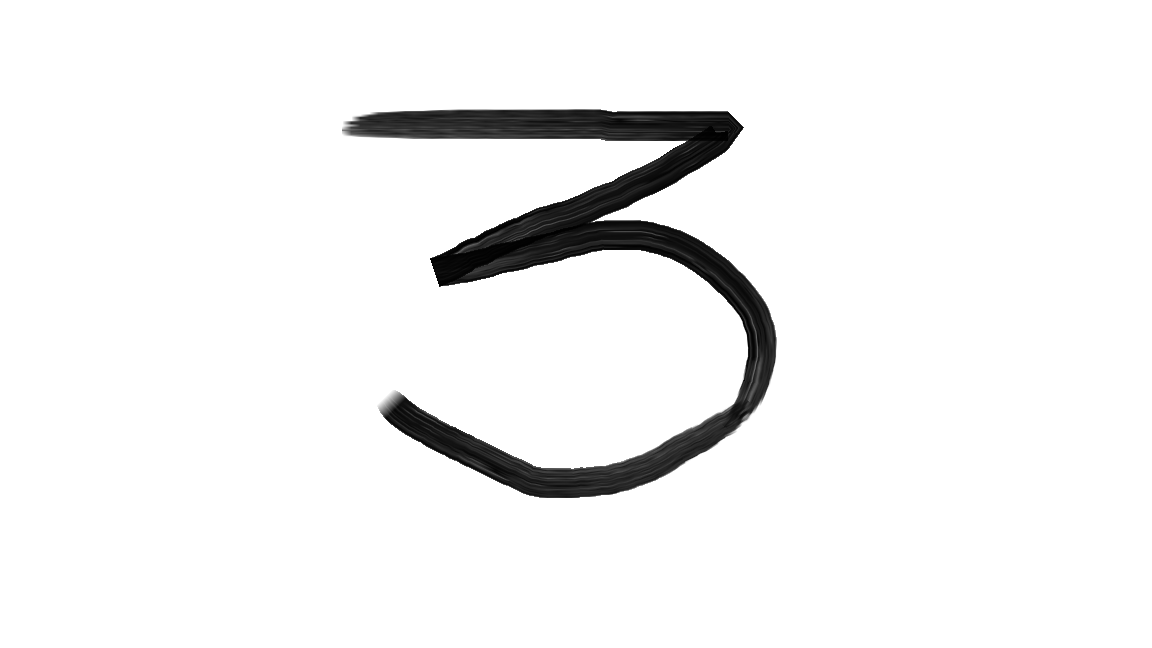

(255, 255, 255)
-69
-132
-261
-384
-174
-132
-93
-69
-72
-60
-123
-177
-285
-399
-219
-177
-138
-75
-90
-135
-141
-93
-60
-102
-180
-225
-309
-414
-258
-222
-183
-123
-60
-132
-201
-213
-141
-87
-144
-237
-270
-333
-429
-303
-267
-228
-168
-87
-177
-270
-282
-189
-117
-183
-291
-315
-360
-441
-342
-309
-273
-216
-120
-222
-336
-351
-234
-144
-225
-348
-360
-384
-459
-387
-354
-318
-261
-150
-264
-402
-423
-282
-171
-267
-405
-408
-408
-471
-429
-399
-363
-309
-177
-309
-468
-492
-327
-201
-306
-459
-456
-432
-486
-471
-444
-405
-354
-210
-354
-537
-564
-375
-228
-348
-516
-501
-456
-504
-513
-489
-453
-402
-240
-396
-600
-630
-420
-258
-390
-570
-543
-480
-516
-555
-531
-495
-447
-270
-72
-75
-63
-60
-420
-603
-630
-444
-297
-414
-573
-552
-486
-522
-558
-531
-504
-450
-285
-69
-57
-141
-147
-126
-123
-444
-606
-630
-468
-339
-441
-579
-561
-489
-531
-561
-534
-513
-459
-300
-96
-87
-210
-219
-186
-180
-468
-609
-630
-492
-381
-465
-582
-570
-495
-537
-564
-534
-519
-462
-315
-123
-117

(28, 28, 3)
1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1.0
[3]


In [44]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/3.png",model)

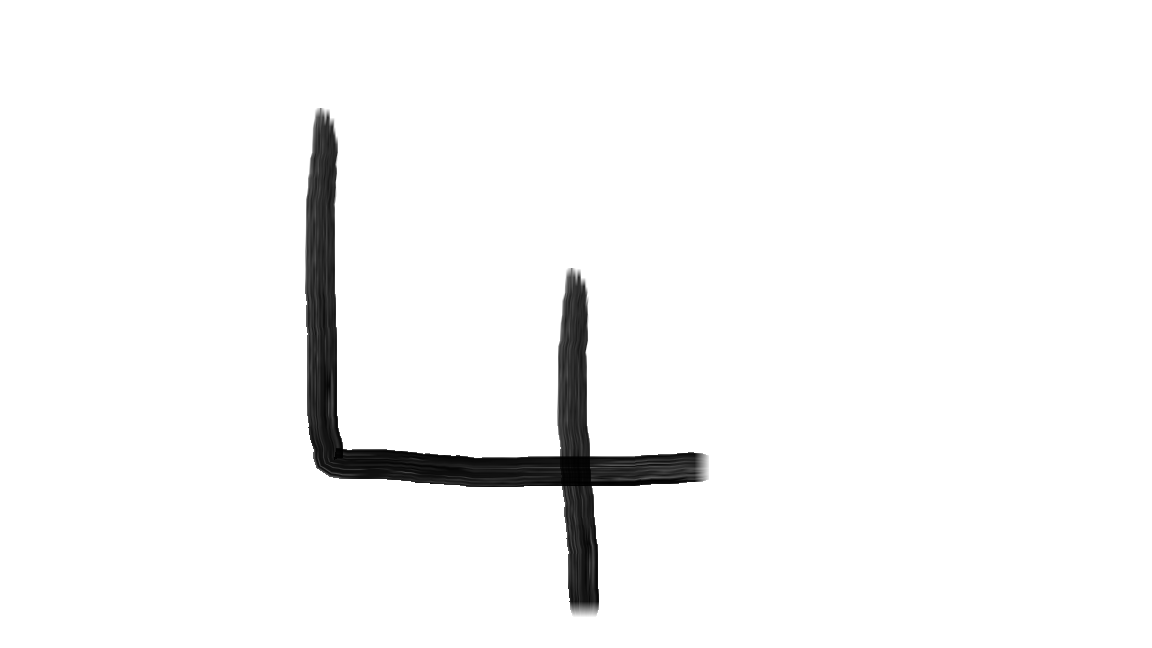

(255, 255, 255)
-51
-63
-72
-84
-96
-105
-117
-126
-138
-150
-165
-180
-195
-210
-228
-243
-258
-270
-270
-267
-264
-261
-261
-258
-255
-252
-249
-243
-237
-231
-222
-216
-210
-204
-195
-192
-198
-207
-213
-222
-228
-237
-243
-252
-264
-282
-303
-321
-342
-363
-384
-405
-423
-438
-444
-450
-453
-456
-462
-465
-90
-177
-258
-330
-336
-345
-351
-357
-363
-369
-378
-387
-396
-408
-408
-408
-411
-411
-414
-414
-414
-414
-411
-411
-411
-411
-411
-411
-411
-414
-417
-423
-426
-432
-435
-441
-444
-447
-450
-453
-459
-462
-465
-465
-471
-474
-474
-471
-468
-462
-456
-453
-447
-441
-438
-438
-444
-453
-459
-468
-477
-486
-495
-501
-507
-510
-510
-510
-513
-513
-513
-513
-513
-516
-513
-513
-513
-513
-513
-513
-513
-513
-513
-516
-519
-522
-528
-531
-534
-537
-540
-540
-540
-540
-537
-534
-534
-531
-522
-516
-507
-501
-495
-489
-480
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-474
-474
-477
-477
-480
-480
-483
-483
-486
-489
-492
-495
-81
-126
-171
-219
-270
-357
-450
-513
-528
-549
-573
-

(28, 28, 3)
1/1 [==============================] - 0s 12ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1.0
[4]


In [45]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/4.png",model)

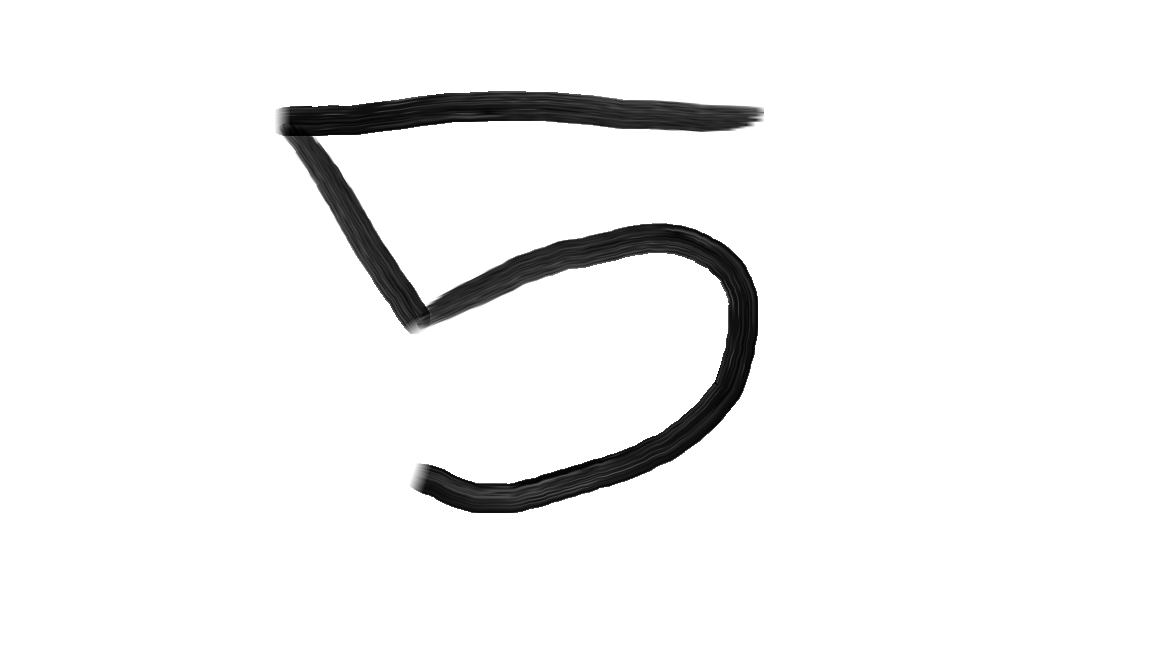

(255, 255, 255)
-66
-84
-78
-84
-78
-81
-87
-75
-90
-87
-90
-90
-90
-87
-87
-81
-81
-84
-87
-87
-90
-90
-90
-90
-66
-114
-120
-120
-126
-114
-126
-132
-114
-132
-132
-135
-135
-135
-132
-135
-123
-123
-126
-132
-132
-135
-135
-138
-138
-117
-165
-156
-165
-171
-150
-171
-174
-159
-177
-177
-180
-180
-180
-177
-180
-168
-165
-180
-186
-183
-186
-183
-183
-183
-174
-168
-213
-195
-210
-207
-192
-216
-213
-204
-222
-222
-225
-225
-225
-225
-225
-213
-240
-255
-276
-279
-264
-246
-237
-231
-228
-183
-222
-249
-240
-255
-240
-237
-261
-252
-249
-267
-267
-273
-273
-273
-273
-273
-261
-330
-345
-360
-381
-396
-384
-315
-288
-279
-243
-285
-282
-288
-297
-267
-282
-306
-291
-300
-312
-315
-318
-318
-321
-321
-321
-306
-399
-426
-438
-459
-474
-483
-468
-399
-345
-315
-264
-345
-315
-336
-342
-294
-336
-354
-327
-348
-357
-360
-363
-366
-366
-369
-369
-495
-453
-465
-492
-522
-537
-546
-549
-543
-483
-399
-327
-306
-381
-354
-378
-381
-330
-384
-399
-366
-393
-402
-405
-408
-411
-411
-414
-414

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1.0
[5]


In [46]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/5.png",model)

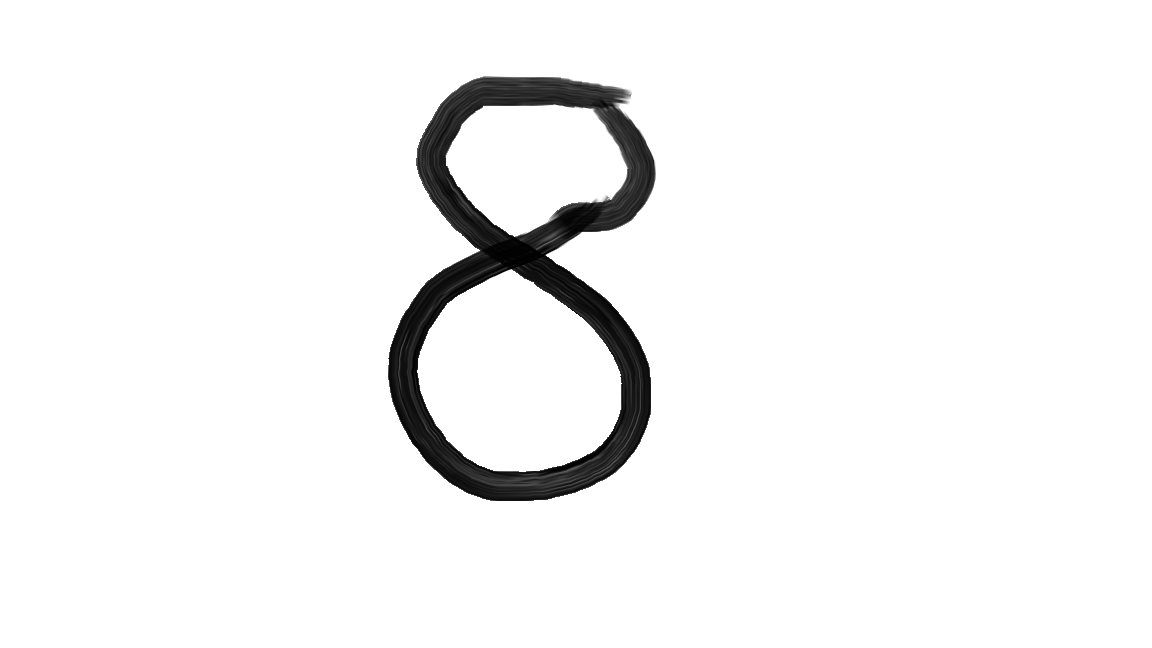

(255, 255, 255)
-474
-432
-447
-465
-480
-498
-516
-531
-549
-564
-582
-600
-618
-588
-528
-468
-504
-537
-570
-603
-636
-672
-711
-705
-699
-693
-687
-681
-690
-708
-723
-735
-738
-738
-738
-738
-738
-738
-738
-738
-738
-738
-738
-738
-681
-633
-597
-561
-525
-489
-450
-498
-549
-597
-642
-681
-714
-735
-735
-735
-735
-735
-735
-735
-738
-738
-738
-738
-738
-738
-738
-738
-738
-735
-735
-735
-735
-735
-735
-735
-735
-735
-735
-738
-738
-738
-738
-738
-738
-738
-729
-693
-657
-615
-561
-507
-450
-534
-621
-678
-726
-735
-735
-735
-735
-735
-735
-732
-732
-732
-729
-729
-729
-729
-732
-732
-732
-732
-732
-732
-732
-732
-732
-729
-729
-729
-726
-726
-726
-726
-729
-732
-735
-735
-738
-738
-738
-738
-738
-738
-738
-741
-738
-738
-738
-726
-672
-618
-555
-492
-429
-507
-594
-681
-735
-735
-735
-735
-732
-732
-729
-729
-726
-726
-726
-723
-723
-723
-720
-720
-720
-720
-720
-720
-720
-720
-720
-717
-717
-717
-717
-714
-714
-714
-714
-714
-714
-717
-720
-726
-729
-729
-732
-732
-732
-735
-735

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1.0
[8]


In [47]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/8.png",model)

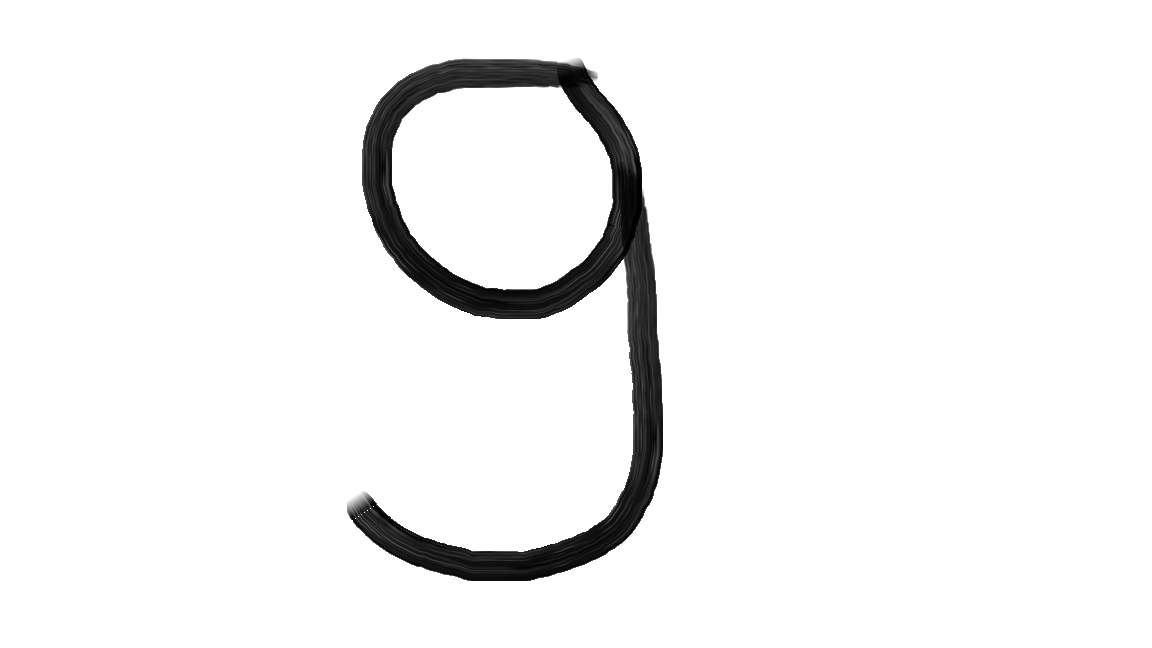

(255, 255, 255)
-78
-114
-153
-192
-234
-273
-309
-342
-369
-339
-291
-54
-90
-129
-165
-204
-246
-288
-327
-372
-411
-438
-465
-414
-342
-51
-93
-114
-135
-165
-204
-246
-288
-330
-378
-429
-474
-510
-537
-558
-483
-393
-66
-105
-150
-192
-216
-237
-252
-267
-318
-378
-429
-480
-528
-576
-612
-639
-648
-552
-393
-69
-90
-108
-150
-189
-231
-273
-321
-351
-339
-354
-414
-474
-525
-582
-627
-678
-711
-714
-633
-471
-84
-126
-156
-165
-180
-219
-261
-303
-363
-423
-417
-393
-438
-504
-564
-624
-681
-720
-732
-723
-711
-69
-99
-135
-177
-225
-264
-279
-288
-291
-345
-405
-468
-510
-489
-462
-522
-594
-660
-693
-714
-726
-729
-714
-609
-423
-60
-96
-129
-153
-186
-219
-255
-300
-351
-375
-351
-378
-441
-507
-570
-603
-570
-531
-591
-642
-678
-708
-720
-732
-720
-663
-477
-51
-75
-114
-153
-192
-219
-246
-279
-309
-330
-396
-459
-429
-402
-468
-537
-600
-669
-675
-585
-564
-618
-696
-717
-729
-723
-711
-531
-75
-105
-126
-165
-207
-246
-285
-318
-345
-372
-387
-429
-507
-525
-483
-477
-546


(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.8162963e-32 1.0000000e+00]]
1.0
[9]


In [48]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/9.png",model)